In [1]:
# Imports

import heatmap
import torch
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

/home/dgarreau/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Loading the datasets

# setting images_idx=[id_1,id_2,...], you can select images id1, id_2,... 
# images_idx=[] will use all images from the dataset
# dataset_name can be 'stackgen', 'stackmix', or any valid folder name in data/ containing images 
my_data = heatmap.load_dataset(dataset_name='stackgen', images_idx = [])

In [3]:
# Loading the model

# masked=True corresponds to the masked-VGG16 
custom_model = heatmap.load_model(masked=True)

/home/dgarreau/Documents/research_local/current_projects/cam-can-see-through-walls/figure_code/heatmap.py:116: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = tor

In [11]:
# Computing CAM-based saliency maps

# the following CAM-based methods are supported: GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, LayerCAM
my_method = "GradCAM"
# class_target argument specifies which ImageNet-1k class (out of 1000) to compute the CAM heatmap for. 
# class_target=None means that CAM will be computed for the class with the highest predicted score.
# layers_idx = [-3] corresponds to the output of the last convolutional block.
my_heatmaps = heatmap.get_heatmaps(custom_model, 
                                  my_data, layers_idx = [-3], 
                                  method=my_method, 
                                  class_target = None)


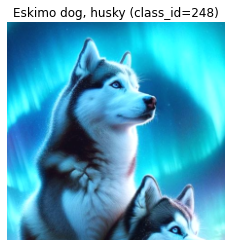

In [12]:
# Looking at a specific image
index_of_chosen_img = 44
heatmap.plot_image(custom_model, 
                   my_data, 
                   idx = index_of_chosen_img, 
                   save=False)

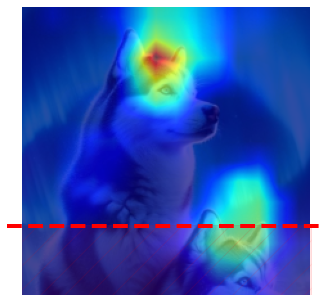

In [13]:
# Visualizing the heatmap

# if masked=True, the network's predictions do not depend on pixel values in the red area 
# in that case, non-zero saliency maps in that area is not faithful to the model
# set save=True to save the plot into figures/
heatmap.plot_heatmap_with_wall(my_heatmaps, 
                               my_data, 
                               idx = index_of_chosen_img, 
                               save=False)

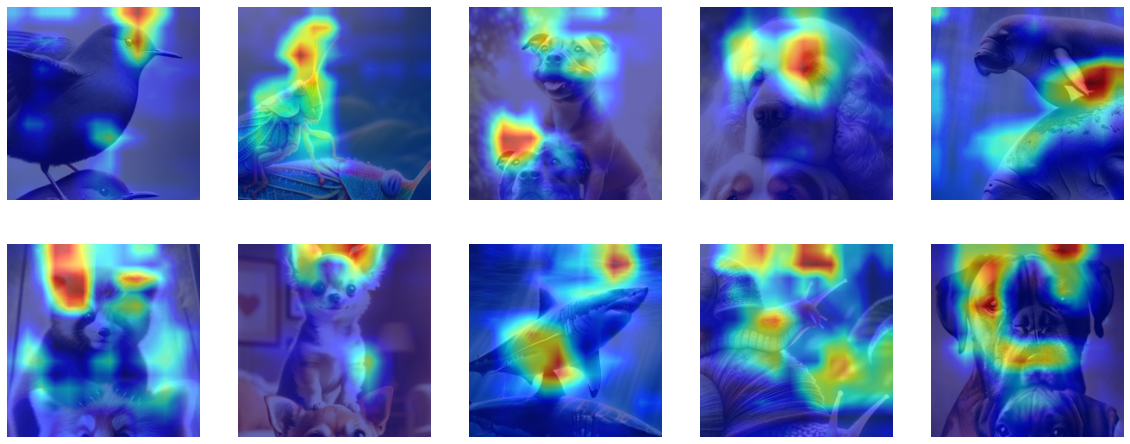

In [14]:
# Visualizing more results

# plotting 10 random saliency maps from STACK-GEN
heatmap.plot_10_random_heatmaps(my_heatmaps, my_data)

In [15]:
# Computing metrics

# convert heatmap to tensor
grayscale_heatmap = torch.tensor(my_heatmap)

# l2-norm of dead zone divided by whole l2-norm of saliency map as in Table 1 of the paper
norms = torch.norm(grayscale_heatmap[:, -54:, :], dim = (1,2)) / torch.norm(grayscale_heatmap, dim = (1,2))

print(f"activation in the deadzone: mean = {torch.mean(norms).item():.2f}, std = {torch.std(norms).item():.2f}")

activation in the deadzone: mean = 0.22, std = 0.12
